# Import

In [5]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_core.documents import Document
from langchain_community.document_loaders import PyPDFLoader
from langchain_openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()


True

# Specify the LLM used

In [7]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=0, model_name="gpt-4-turbo", )

llm_transformer = LLMGraphTransformer(llm=llm)

c:\Users\vuthi\OneDrive\Local Disk(D)\Coding\text-to-knowledge-graph\.kg_env\Lib\site-packages\langchain_openai\chat_models\base.py:1690: UserWarning: Cannot use method='json_schema' with model gpt-4-turbo since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


# Split text into Chunks

In [9]:
text = """
The beloved Tiramisu is one of the most popular desserts in Italian-American culture. With it’s sponge-like texture and coffee-soaked flavor, Tiramisu, which translated to “pick me up”, is a favorite on many a Chicago Italian restaurant menu.
Surprisingly, Tiramisu is not as ancient as Rome.  This Dolce has an interesting history harking back to the 1960s. Even more surprising, Tiramisu didn’t become popular with Americans until the 1980s. So where did Tiramisu originate? It appears that there are several different thoughts on how the Italian “aphrodisiac” came to be. Let’s dive in.
According to some, Tiramisu was first invented in Veneto, at a tiny restaurant known as 'Le Beccherie.' The owner, Robert Linguanotto, created a “simple” dessert that let the flavors speak for themselves. The traditional ingredients are egg yolks, sugar, mascarpone, cocoa powder, coffee, finger biscuits, and often times, coffee liquor. Although the core ingredients still remain the same, this dish is often tweaked from chef to chef.
"""

In [10]:
documents = [Document(page_content=text)]
documents

[Document(metadata={}, page_content="\nThe beloved Tiramisu is one of the most popular desserts in Italian-American culture. With it’s sponge-like texture and coffee-soaked flavor, Tiramisu, which translated to “pick me up”, is a favorite on many a Chicago Italian restaurant menu.\nSurprisingly, Tiramisu is not as ancient as Rome.  This Dolce has an interesting history harking back to the 1960s. Even more surprising, Tiramisu didn’t become popular with Americans until the 1980s. So where did Tiramisu originate? It appears that there are several different thoughts on how the Italian “aphrodisiac” came to be. Let’s dive in.\nAccording to some, Tiramisu was first invented in Veneto, at a tiny restaurant known as 'Le Beccherie.' The owner, Robert Linguanotto, created a “simple” dessert that let the flavors speak for themselves. The traditional ingredients are egg yolks, sugar, mascarpone, cocoa powder, coffee, finger biscuits, and often times, coffee liquor. Although the core ingredients s

In [37]:
graph_documents = await llm_transformer.aconvert_to_graph_documents(documents)
graph_nodes = graph_documents[0].nodes
graph_relationships = graph_documents[0].relationships
print(f"Nodes count: {len(graph_nodes)}")

Nodes count: 16


# Visualize knowledge graph

In [43]:
from pyvis.network import Network
from IPython.display import display, HTML
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [17]:
def parse_nodes(nodes):
    return [(node.id, node.type) for node in nodes]

def parse_relationships(relationships):
    return [(relationship.source.id, relationship.target.id, relationship.type) for relationship in relationships]

In [39]:
nodes = parse_nodes(graph_nodes)
edges = parse_relationships(graph_relationships)

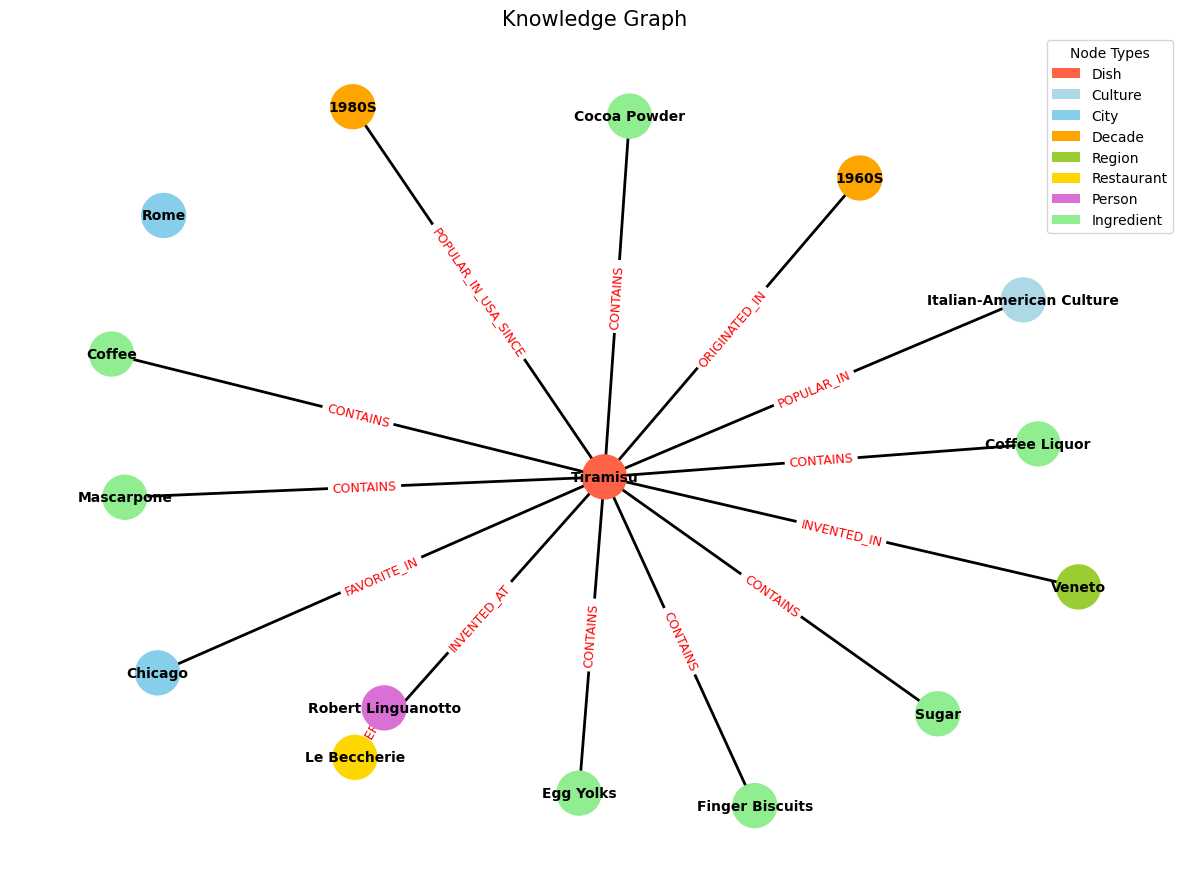

In [44]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes with type as an attribute
for node_id, node_type in nodes:
    G.add_node(node_id, type=node_type)
    
# Add edges with relationship type as a label
for source, target, rel_type in edges:
    G.add_edge(source, target, label=rel_type)

# Set up layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes with different colors based on type
node_colors = []
color_map = {
    'Dish': 'tomato',
    'Culture': 'lightblue',
    'City': 'skyblue',
    'Decade': 'orange',
    'Region': 'yellowgreen',
    'Restaurant': 'gold',
    'Person': 'orchid',
    'Ingredient': 'lightgreen'
}
for node in G.nodes(data=True):
    node_type = node[1]['type']
    node_colors.append(color_map.get(node_type, 'gray'))

# Draw the graph
plt.figure(figsize=(12, 9))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', width=2)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=9)

# Create custom legend handles
legend_elements = [Patch(facecolor=color, label=node_type) for node_type, color in color_map.items()]

plt.title("Knowledge Graph", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.legend(handles=legend_elements, title="Node Types")
plt.show()